In [ ]:
#CUALES SON LOS PAISES CON MAYOR TASA DE SUICIDIO EL 2019?
#CUALES SON LOS PAISES CON MAYOR TASA DE SUICIDIO ENTRE EL 2000 Y 2019?
#CUALES SON LOS PAISES CON MENOR TASA DE SUICIDIO ENTRE EL 2000 Y 2019?
#CUALES SON LOS PAISES CON MENOR TASA DE SUICIDIO ENTRE EL 2000 Y 2019?
#CUAL ES LA TASA DE SUICIDIO EN LOS CONTINENTES?, CALCULADO COMO MEDIA/MEDIANA
#CUAL ES LA TASA DE SUICIDIO EN LOS PAISES AMERICANOS ENTRE EL 2000 Y 2019?
#CUAL ES LA TASA DE SUICIDIO EN CHILE ENTRE EL 2000 Y 2019?
#MOSTRAR COMO MAPAS.
#VIDEO DE TASA POR PAIS
#GRAFICO LINEAS EN CADA PAIS
#GRAFICO DE PUNTOS POR CONJUNTO DE PAISES.
#GRAFICO DE TASA POR AÑO.


In [1]:
#carga de librerias
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
pd.options.display.max_columns = None #me mostrará todas las columnas

In [2]:
df=pd.read_csv(r"C:\Users\Tenzing\Documents\GitHub\PROYECTO-PORTAFOLIO\Data\World_Sucide_rates.csv", delimiter = ",")

In [3]:
#df=pd.read_csv(r"C:\datasets\World_Sucide_rates.csv", delimiter = ",")

In [4]:
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,True,Sex,Male,MLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-02-08T18:30:00.000Z
1,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Female,FMLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,0.11,NaN,0.22,0.16 [0.11 – 0.22],NaN,NaN,EN,2021-02-08T18:30:00.000Z
2,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,NaN,NaN,0.22,NaN,0.42,0.31 [0.22 – 0.42],NaN,NaN,EN,2021-02-08T18:30:00.000Z
3,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,True,Sex,Both sexes,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32,NaN,NaN,0.22,NaN,0.45,0.32 [0.22 – 0.45],NaN,NaN,EN,2021-02-08T18:30:00.000Z
4,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Male,MLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,NaN,NaN,0.34,NaN,0.65,0.49 [0.34 – 0.65],NaN,NaN,EN,2021-02-08T18:30:00.000Z


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               10980 non-null  object 
 1   Indicator                   10980 non-null  object 
 2   ValueType                   10980 non-null  object 
 3   ParentLocationCode          10980 non-null  object 
 4   ParentLocation              10980 non-null  object 
 5   Location type               10980 non-null  object 
 6   SpatialDimValueCode         10980 non-null  object 
 7   Location                    10980 non-null  object 
 8   Period type                 10980 non-null  object 
 9   Period                      10980 non-null  int64  
 10  IsLatestYear                10980 non-null  bool   
 11  Dim1 type                   10980 non-null  object 
 12  Dim1                        10980 non-null  object 
 13  Dim1ValueCode               109

In [6]:
#Se verifica que valores tiene la variable Period type, observandose que sólo contiene un string Year. Se procede a eliminar.
df["Period type"].unique()

array(['Year'], dtype=object)

In [7]:
#Se verifica que valores tiene la variable location type, observandose que sólo contiene un string Country. Se procede a eliminar.
df["Location type"].unique()

array(['Country'], dtype=object)

In [8]:
df=df[["ParentLocationCode","ParentLocation","SpatialDimValueCode", "Location", "Period","IsLatestYear","Dim1 type","Dim1","FactValueNumeric", "FactValueNumericLow","FactValueNumericHigh","Value"]]

In [9]:
df

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,AMR,Americas,ATG,Antigua and Barbuda,2019,True,Sex,Male,0.00,0.00,0.00,0 [0 – 0]
1,AMR,Americas,BRB,Barbados,2019,True,Sex,Female,0.16,0.11,0.22,0.16 [0.11 – 0.22]
2,AMR,Americas,BRB,Barbados,2019,True,Sex,Both sexes,0.31,0.22,0.42,0.31 [0.22 – 0.42]
3,AMR,Americas,ATG,Antigua and Barbuda,2019,True,Sex,Both sexes,0.32,0.22,0.45,0.32 [0.22 – 0.45]
4,AMR,Americas,BRB,Barbados,2019,True,Sex,Male,0.49,0.34,0.65,0.49 [0.34 – 0.65]
...,...,...,...,...,...,...,...,...,...,...,...,...
10975,AFR,Africa,GIN,Guinea,2000,False,Sex,Both sexes,9.73,5.57,15.96,9.73 [5.57 – 15.96]
10976,AFR,Africa,GHA,Ghana,2000,False,Sex,Both sexes,9.75,6.46,14.30,9.75 [6.46 – 14.3]
10977,EUR,Europe,MLT,Malta,2000,False,Sex,Male,9.75,7.56,12.29,9.75 [7.56 – 12.29]
10978,AFR,Africa,SYC,Seychelles,2000,False,Sex,Both sexes,9.76,6.60,13.46,9.76 [6.6 – 13.46]


In [10]:
df.describe()

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,10980.000000,10980.000000,10980.000000,10980.000000
mean,2009.500000,11.960951,8.175477,17.388002
std,5.766544,12.812487,8.324872,20.038127
min,2000.000000,0.000000,0.000000,0.000000
25%,2004.750000,4.630000,3.060000,6.510000
50%,2009.500000,8.270000,5.450000,12.030000
75%,2014.250000,14.940000,10.622500,21.200000
max,2019.000000,195.200000,86.390000,343.200000


## TOP TEN MAYORES TASAS DE SUICIDIOS POR PAÍS SOLO EN EL ULTIMO AÑO DE LA BASE (2019)

In [11]:
df2019=df[(df["Period"]==2019)&(df["Dim1"]=="Both sexes")].sort_values("FactValueNumeric", ascending=False)

In [12]:
df2019.head(10)

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
523,AFR,Africa,LSO,Lesotho,2019,True,Sex,Both sexes,87.48,32.36,166.90,87.48 [32.36 – 166.9]
364,AMR,Americas,GUY,Guyana,2019,True,Sex,Both sexes,40.85,27.04,66.78,40.85 [27.04 – 66.78]
363,AFR,Africa,SWZ,Eswatini,2019,True,Sex,Both sexes,40.46,20.07,69.18,40.46 [20.07 – 69.18]
317,WPR,Western Pacific,KIR,Kiribati,2019,True,Sex,Both sexes,30.56,19.07,45.69,30.56 [19.07 – 45.69]
265,WPR,Western Pacific,FSM,Micronesia (Federated States of),2019,True,Sex,Both sexes,28.99,11.80,47.00,28.99 [11.8 – 47]
262,AMR,Americas,SUR,Suriname,2019,True,Sex,Both sexes,25.89,17.38,36.82,25.89 [17.38 – 36.82]
254,AFR,Africa,ZWE,Zimbabwe,2019,True,Sex,Both sexes,23.63,12.62,37.48,23.63 [12.62 – 37.48]
253,AFR,Africa,ZAF,South Africa,2019,True,Sex,Both sexes,23.49,16.22,32.13,23.49 [16.22 – 32.13]
251,AFR,Africa,MOZ,Mozambique,2019,True,Sex,Both sexes,23.19,13.59,36.38,23.19 [13.59 – 36.38]
250,AFR,Africa,CAF,Central African Republic,2019,True,Sex,Both sexes,22.96,12.75,37.60,22.96 [12.75 – 37.6]


## TOP TEN MAYORES TASAS DE SUICIDIOS POR PAÍS INCLUYENDO TODOS LOS AÑOS.

In [13]:
dftopten=df[df["Dim1"]=="Both sexes"].sort_values("FactValueNumeric", ascending=False)

In [14]:
dftopten.head(10)

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
2831,AFR,Africa,LSO,Lesotho,2014,False,Sex,Both sexes,116.20,43.40,217.7,116.2 [43.4 – 217.7]
2280,AFR,Africa,LSO,Lesotho,2015,False,Sex,Both sexes,114.50,42.50,215.9,114.5 [42.5 – 215.9]
3378,AFR,Africa,LSO,Lesotho,2013,False,Sex,Both sexes,111.40,41.69,208.0,111.4 [41.69 – 208]
1716,AFR,Africa,LSO,Lesotho,2016,False,Sex,Both sexes,107.10,39.37,201.8,107.1 [39.37 – 201.8]
3906,AFR,Africa,LSO,Lesotho,2012,False,Sex,Both sexes,102.00,38.05,189.7,102 [38.05 – 189.7]
1646,AFR,Africa,LSO,Lesotho,2017,False,Sex,Both sexes,96.29,35.22,181.9,96.29 [35.22 – 181.9]
1097,AFR,Africa,LSO,Lesotho,2018,False,Sex,Both sexes,93.07,34.29,176.3,93.07 [34.29 – 176.3]
4940,AFR,Africa,LSO,Lesotho,2011,False,Sex,Both sexes,91.07,33.88,169.4,91.07 [33.88 – 169.4]
523,AFR,Africa,LSO,Lesotho,2019,True,Sex,Both sexes,87.48,32.36,166.9,87.48 [32.36 – 166.9]
5467,AFR,Africa,LSO,Lesotho,2010,False,Sex,Both sexes,86.89,32.47,160.6,86.89 [32.47 – 160.6]


## TOP TEN MENORES TASAS DE SUICIDIOS POR PAÍS SOLO EN EL ULTIMO AÑO DE LA BASE (2019)

In [15]:
df2019.sort_values("FactValueNumeric", ascending=True).head(10)

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
2,AMR,Americas,BRB,Barbados,2019,True,Sex,Both sexes,0.31,0.22,0.42,0.31 [0.22 – 0.42]
3,AMR,Americas,ATG,Antigua and Barbuda,2019,True,Sex,Both sexes,0.32,0.22,0.45,0.32 [0.22 – 0.45]
7,AMR,Americas,GRD,Grenada,2019,True,Sex,Both sexes,0.64,0.45,0.88,0.64 [0.45 – 0.88]
19,AMR,Americas,VCT,Saint Vincent and the Grenadines,2019,True,Sex,Both sexes,1.01,0.70,1.41,1.01 [0.7 – 1.41]
48,EMR,Eastern Mediterranean,JOR,Jordan,2019,True,Sex,Both sexes,1.98,1.29,2.90,1.98 [1.29 – 2.9]
188,AMR,Americas,VEN,Venezuela (Bolivarian Republic of),2019,True,Sex,Both sexes,2.10,1.38,3.03,2.1 [1.38 – 3.03]
189,EMR,Eastern Mediterranean,SYR,Syrian Arab Republic,2019,True,Sex,Both sexes,2.11,1.28,3.23,2.11 [1.28 – 3.23]
193,AFR,Africa,STP,Sao Tome and Principe,2019,True,Sex,Both sexes,2.20,1.18,3.62,2.2 [1.18 – 3.62]
198,AMR,Americas,JAM,Jamaica,2019,True,Sex,Both sexes,2.28,1.53,3.25,2.28 [1.53 – 3.25]
200,EUR,Europe,TUR,Turkey,2019,True,Sex,Both sexes,2.34,1.56,3.49,2.34 [1.56 – 3.49]


## TOP TEN MENORES TASAS DE SUICIDIOS POR PAÍS INCLUYENDO TODOS LOS AÑOS.

In [16]:
dftopten.sort_values("FactValueNumeric").head(10)

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
5490,AMR,Americas,ATG,Antigua and Barbuda,2009,False,Sex,Both sexes,0.000,0.000,0.00,0 [0 – 0]
3843,AMR,Americas,ATG,Antigua and Barbuda,2012,False,Sex,Both sexes,0.000,0.000,0.00,0 [0 – 0]
1098,AMR,Americas,ATG,Antigua and Barbuda,2017,False,Sex,Both sexes,0.000,0.000,0.00,0 [0 – 0]
1101,AMR,Americas,VCT,Saint Vincent and the Grenadines,2017,False,Sex,Both sexes,0.000,0.000,0.00,0 [0 – 0]
3294,AMR,Americas,ATG,Antigua and Barbuda,2013,False,Sex,Both sexes,0.000,0.000,0.00,0 [0 – 0]
3298,AMR,Americas,BRB,Barbados,2013,False,Sex,Both sexes,0.097,0.073,0.12,0.097 [0.073 – 0.12]
4943,AMR,Americas,ATG,Antigua and Barbuda,2010,False,Sex,Both sexes,0.130,0.091,0.18,0.13 [0.091 – 0.18]
4395,AMR,Americas,ATG,Antigua and Barbuda,2011,False,Sex,Both sexes,0.160,0.110,0.22,0.16 [0.11 – 0.22]
3847,AMR,Americas,BRB,Barbados,2012,False,Sex,Both sexes,0.210,0.160,0.28,0.21 [0.16 – 0.28]
6041,AMR,Americas,ATG,Antigua and Barbuda,2008,False,Sex,Both sexes,0.250,0.170,0.34,0.25 [0.17 – 0.34]


## TASA DE SUICIDIO POR CONTINENTES INCLUYENDO TODOS LOS AÑOS

In [17]:
df_cont=dftopten.groupby("ParentLocation")["FactValueNumeric"].agg([min,max,np.mean])

In [18]:
df_cont

,min,max,mean
ParentLocation,,,
Africa,1.99,116.20,16.635064
Americas,0.00,40.85,8.118844
Eastern Mediterranean,1.75,16.83,6.239167
Europe,0.33,48.89,12.301170
South-East Asia,2.55,28.58,7.916273
Western Pacific,1.14,35.64,12.680333


## TASA DE SUICIDIO POR CONTINENTES INCLUYENDO 2014-2019

In [19]:
df1419=df[df["Period"]>2014]

In [20]:
df1419

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,AMR,Americas,ATG,Antigua and Barbuda,2019,True,Sex,Male,0.00,0.00,0.00,0 [0 – 0]
1,AMR,Americas,BRB,Barbados,2019,True,Sex,Female,0.16,0.11,0.22,0.16 [0.11 – 0.22]
2,AMR,Americas,BRB,Barbados,2019,True,Sex,Both sexes,0.31,0.22,0.42,0.31 [0.22 – 0.42]
3,AMR,Americas,ATG,Antigua and Barbuda,2019,True,Sex,Both sexes,0.32,0.22,0.45,0.32 [0.22 – 0.45]
4,AMR,Americas,BRB,Barbados,2019,True,Sex,Male,0.49,0.34,0.65,0.49 [0.34 – 0.65]
...,...,...,...,...,...,...,...,...,...,...,...,...
2740,AMR,Americas,BOL,Bolivia (Plurinational State of),2015,False,Sex,Male,9.93,5.45,15.70,9.93 [5.45 – 15.7]
2741,EMR,Eastern Mediterranean,PAK,Pakistan,2015,False,Sex,Both sexes,9.96,4.78,17.86,9.96 [4.78 – 17.86]
2742,AFR,Africa,ETH,Ethiopia,2015,False,Sex,Both sexes,9.98,7.17,13.91,9.98 [7.17 – 13.91]
2743,EUR,Europe,TKM,Turkmenistan,2015,False,Sex,Male,9.99,7.87,12.50,9.99 [7.87 – 12.5]


In [21]:
df_cont1419=df1419.groupby("ParentLocation")["FactValueNumeric"].agg([min,max,np.mean])

In [22]:
df_cont1419

,min,max,mean
ParentLocation,,,
Africa,1.15,191.50,15.591135
Americas,0.00,64.97,7.883475
Eastern Mediterranean,0.71,23.19,5.612444
Europe,0.26,51.68,10.233640
South-East Asia,0.84,23.95,6.879576
Western Pacific,0.63,55.36,12.066349


## CURVAS DE SUICIDIO POR CONTINENTE Y AÑO

In [25]:
#FILTRO POR CONTINENTE.
df_am=dftopten[dftopten["ParentLocation"]=="Americas"]
df_eu=dftopten[dftopten["ParentLocation"]=="Europe"]
df_af=dftopten[dftopten["ParentLocation"]=="Africa"]
df_em=dftopten[dftopten["ParentLocation"]=="Eastern Mediterranean"]
df_se=dftopten[dftopten["ParentLocation"]=="South-East Asia"]
df_wp=dftopten[dftopten["ParentLocation"]=="Western Pacific"]


In [27]:
#AGRUPACIÓN DE CADA CONTINENTE POR AÑO, SEGÚN MEDIA ANUAL DE TASA DE SUICIDIO
df_am_y=df_am.groupby("Period")["FactValueNumeric"].mean().reset_index()
df_eu_y=df_eu.groupby("Period")["FactValueNumeric"].mean().reset_index()
df_af_y=df_af.groupby("Period")["FactValueNumeric"].mean().reset_index()
df_em_y=df_em.groupby("Period")["FactValueNumeric"].mean().reset_index()
df_se_y=df_se.groupby("Period")["FactValueNumeric"].mean().reset_index()
df_wp_y=df_wp.groupby("Period")["FactValueNumeric"].mean().reset_index()


In [ ]:
#VERIFICANDO POR EJEMPLO AMERICA
df_am_y

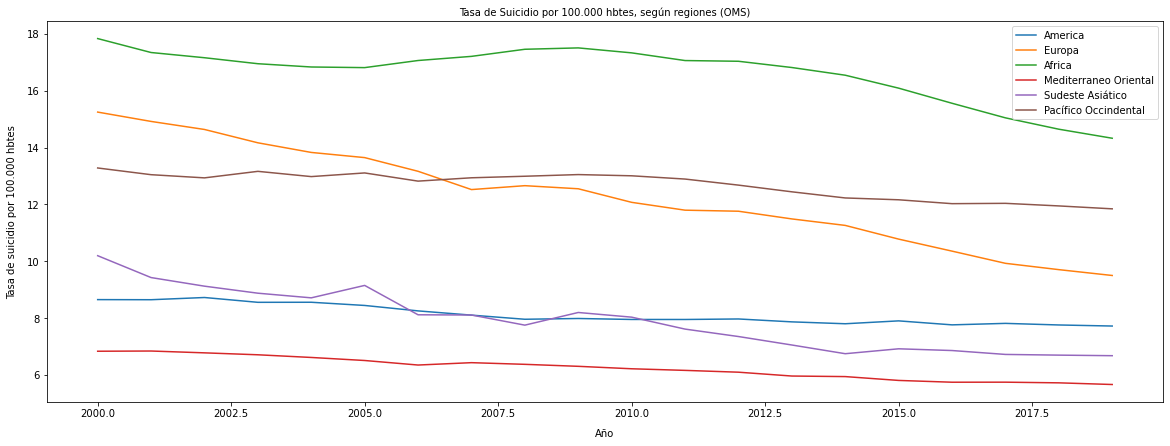

In [28]:
#VISUALIZACIÓN DE CURVAS DE TASAS POR CONTINENTE Y AÑO.
plt.figure(figsize=(20,7))
plt.plot(df_am_y["Period"],df_am_y["FactValueNumeric"], label="America")
plt.plot(df_eu_y["Period"],df_eu_y["FactValueNumeric"], label="Europa")
plt.plot(df_af_y["Period"],df_af_y["FactValueNumeric"], label="Africa")
plt.plot(df_em_y["Period"],df_em_y["FactValueNumeric"], label="Mediterraneo Oriental")
plt.plot(df_se_y["Period"],df_se_y["FactValueNumeric"], label="Sudeste Asiático")
plt.plot(df_wp_y["Period"],df_wp_y["FactValueNumeric"], label="Pacífico Occindental")
plt.legend()
plt.title("Tasa de Suicidio por 100.000 hbtes, según regiones (OMS)",
         loc="center",
         size=10)
plt.xlabel("Año",
          labelpad=10)
plt.ylabel("Tasa de suicidio por 100.000 hbtes",
          labelpad=10)
plt.show()



## TASA DE SUICIDIO DE PAISES AMERICANOS INCLUYENDO TODOS LOS AÑOS

In [29]:
df_am_p=df_am.groupby("Location")["FactValueNumeric"].agg([min,max,np.mean]).reset_index()
df_am_p=df_am_p.sort_values("mean", ascending=False)
df_am_p


,Location,min,max,mean
17,Guyana,33.680,40.85,37.80050
28,Suriname,24.960,27.68,26.51550
31,Uruguay,13.230,18.85,15.51350
18,Haiti,11.170,13.20,12.11750
30,United States of America,10.020,14.51,11.88750
11,Cuba,9.730,15.63,11.22750
29,Trinidad and Tobago,8.280,16.19,11.10650
7,Canada,9.560,11.68,10.42200
8,Chile,7.960,12.12,9.84550
16,Guatemala,6.010,14.16,9.68700


## VISUALIZACION TASA DE SUICIDIO DE PAISES AMERICANOS INCLUYENDO TODOS LOS AÑOS

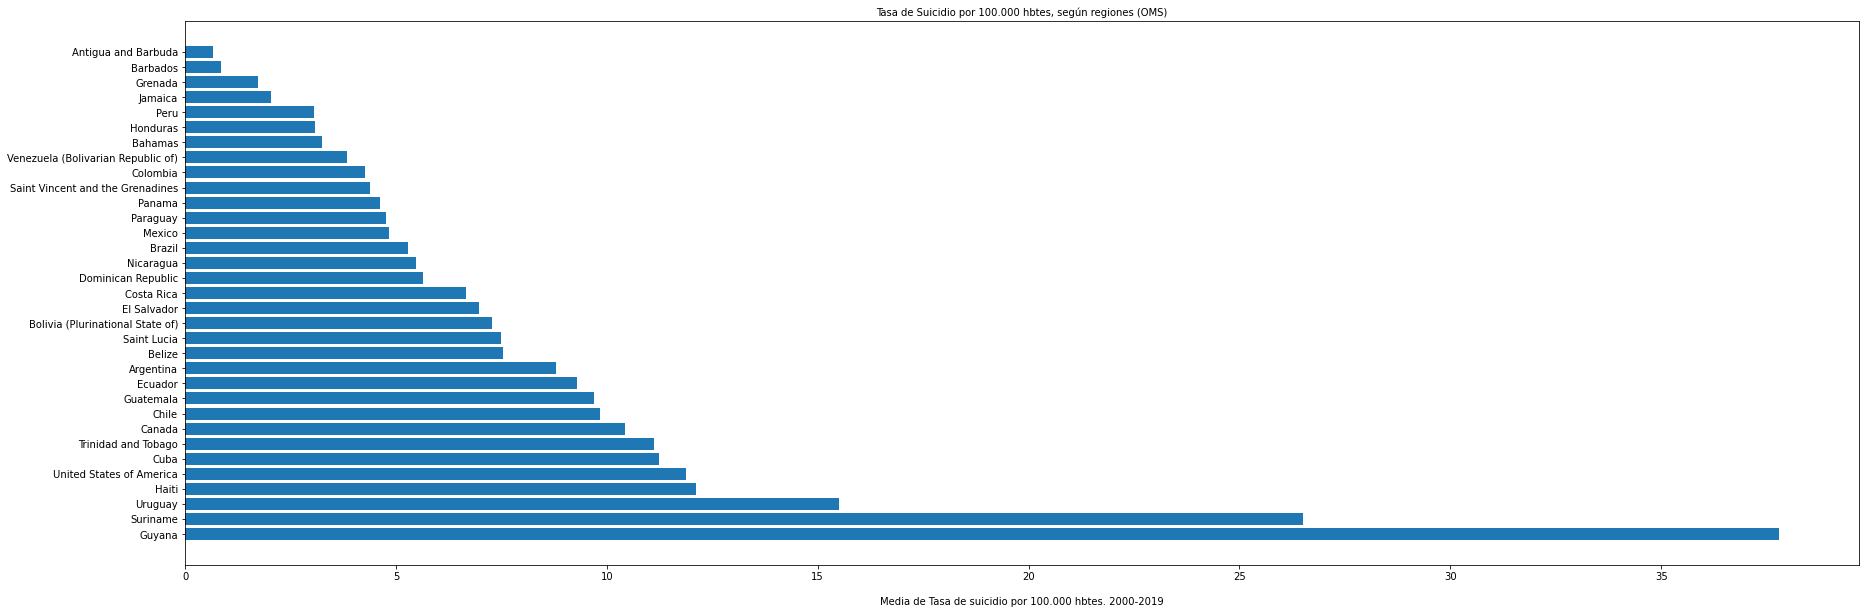

In [30]:
plt.figure(figsize=(30,10))
plt.barh(df_am_p['Location'], df_am_p['mean'])
plt.title("Tasa de Suicidio por 100.000 hbtes, según regiones (OMS)",
         loc="center",
         size=10)
plt.xlabel("Media de Tasa de suicidio por 100.000 hbtes. 2000-2019",
          labelpad=15)
plt.show()



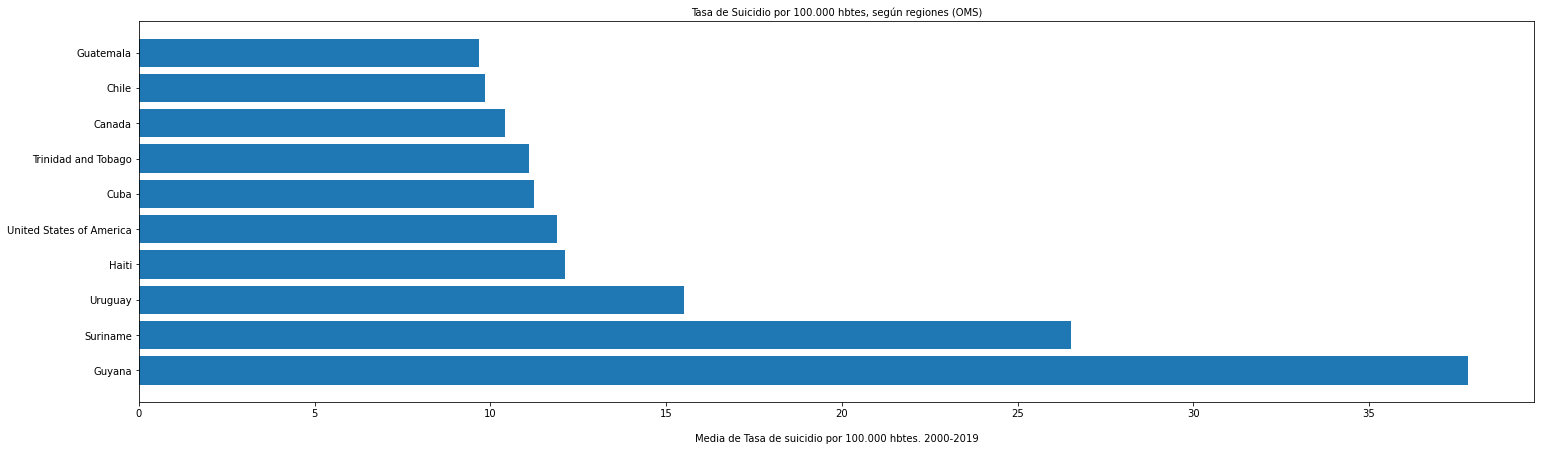

In [31]:
### VISUALIZACIÓN DE SOLO LOS PRIMEROS 10 PAISES CON TASAS DE SUICIDIO MAS ALTAS.
plt.figure(figsize=(25,7))
plt.barh(df_am_p['Location'].head(10), df_am_p['mean'].head(10))
plt.title("Tasa de Suicidio por 100.000 hbtes, según regiones (OMS)",
         loc="center",
         size=10)
plt.xlabel("Media de Tasa de suicidio por 100.000 hbtes. 2000-2019",
          labelpad=15)
plt.show()

In [32]:
#AGRUPACIÓN POR AÑO Y PAIS
df_apai=df_am.groupby(["Location", "Period"])["FactValueNumeric"].mean().reset_index()
df_apai

,Location,Period,FactValueNumeric
0,Antigua and Barbuda,2000,2.01
1,Antigua and Barbuda,2001,1.88
2,Antigua and Barbuda,2002,1.25
3,Antigua and Barbuda,2003,1.44
4,Antigua and Barbuda,2004,1.95
...,...,...,...
655,Venezuela (Bolivarian Republic of),2015,2.37
656,Venezuela (Bolivarian Republic of),2016,2.29
657,Venezuela (Bolivarian Republic of),2017,2.24
658,Venezuela (Bolivarian Republic of),2018,2.21


In [33]:
USA=df_apai[df_apai["Location"]=="United States of America"]
Guatemala=df_apai[df_apai["Location"]=="Guatemala"]
Canada=df_apai[df_apai["Location"]=="Canada"]
TB=df_apai[df_apai["Location"]=="Trinidad and Tobago"]
Guyana=df_apai[df_apai["Location"]=="Guyana"]
Cuba=df_apai[df_apai["Location"]=="Cuba"]
Haiti=df_apai[df_apai["Location"]=="Haiti"]
Uruguay=df_apai[df_apai["Location"]=="Uruguay"]
Suriname=df_apai[df_apai["Location"]=="Suriname"]
Chile=df_apai[df_apai["Location"]=="Chile"]



In [34]:
#PROBANDO QUE EL CONDIGO FUNCIONE
Chile

,Location,Period,FactValueNumeric
160,Chile,2000,10.52
161,Chile,2001,10.38
162,Chile,2002,9.68
163,Chile,2003,9.69
164,Chile,2004,10.01
165,Chile,2005,9.49
166,Chile,2006,9.72
167,Chile,2007,10.65
168,Chile,2008,11.76
169,Chile,2009,12.12


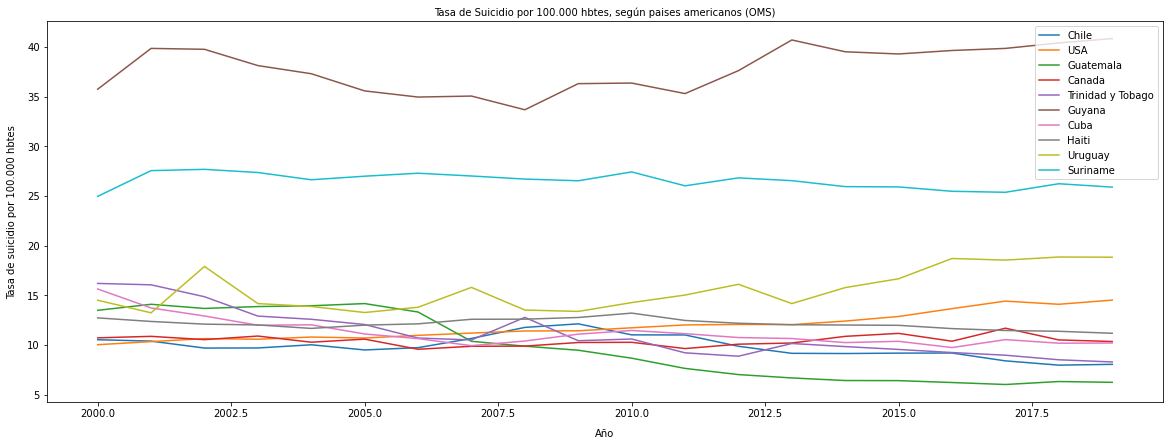

In [35]:
#VISUALIZACIÓN DE CURVAS DE TASAS POR PAIS AMERICANO Y AÑO.
plt.figure(figsize=(20,7))
plt.plot(Chile["Period"],Chile["FactValueNumeric"], label="Chile")
plt.plot(USA["Period"],USA["FactValueNumeric"], label="USA")
plt.plot(Guatemala["Period"],Guatemala["FactValueNumeric"], label="Guatemala")
plt.plot(Canada["Period"],Canada["FactValueNumeric"], label="Canada")
plt.plot(TB["Period"],TB["FactValueNumeric"], label="Trinidad y Tobago")
plt.plot(Guyana["Period"],Guyana["FactValueNumeric"], label="Guyana")
plt.plot(Cuba["Period"],Cuba["FactValueNumeric"], label="Cuba")
plt.plot(Haiti["Period"],Haiti["FactValueNumeric"], label="Haiti")         
plt.plot(Uruguay["Period"],Uruguay["FactValueNumeric"], label="Uruguay")         
plt.plot(Suriname["Period"],Suriname["FactValueNumeric"], label="Suriname")        
plt.legend()
plt.title("Tasa de Suicidio por 100.000 hbtes, según paises americanos (OMS)",
         loc="center",
         size=10)
plt.xlabel("Año",
          labelpad=10)
plt.ylabel("Tasa de suicidio por 100.000 hbtes",
          labelpad=10)
plt.show()


In [47]:
df_am

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
364,AMR,Americas,GUY,Guyana,2019,True,Sex,Both sexes,40.85,27.04,66.78,40.85 [27.04 – 66.78]
3653,AMR,Americas,GUY,Guyana,2013,False,Sex,Both sexes,40.71,30.53,53.31,40.71 [30.53 – 53.31]
912,AMR,Americas,GUY,Guyana,2018,False,Sex,Both sexes,40.41,27.27,65.06,40.41 [27.27 – 65.06]
1417,AMR,Americas,GUY,Guyana,2017,False,Sex,Both sexes,39.86,27.48,63.27,39.86 [27.48 – 63.27]
10212,AMR,Americas,GUY,Guyana,2001,False,Sex,Both sexes,39.86,30.38,66.00,39.86 [30.38 – 66]
...,...,...,...,...,...,...,...,...,...,...,...,...
3843,AMR,Americas,ATG,Antigua and Barbuda,2012,False,Sex,Both sexes,0.00,0.00,0.00,0 [0 – 0]
3294,AMR,Americas,ATG,Antigua and Barbuda,2013,False,Sex,Both sexes,0.00,0.00,0.00,0 [0 – 0]
1101,AMR,Americas,VCT,Saint Vincent and the Grenadines,2017,False,Sex,Both sexes,0.00,0.00,0.00,0 [0 – 0]
1098,AMR,Americas,ATG,Antigua and Barbuda,2017,False,Sex,Both sexes,0.00,0.00,0.00,0 [0 – 0]


In [ ]:
## REVISANDO DATOS DE CHILE

In [50]:
chile=df_am[df_am["Location"]=="Chile"].sort_values("Period")

In [51]:
chile

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1 type,Dim1,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
10476,AMR,Americas,CHL,Chile,2000,False,Sex,Both sexes,10.52,9.15,12.02,10.52 [9.15 – 12.02]
9922,AMR,Americas,CHL,Chile,2001,False,Sex,Both sexes,10.38,9.07,11.78,10.38 [9.07 – 11.78]
9875,AMR,Americas,CHL,Chile,2002,False,Sex,Both sexes,9.68,8.48,15.92,9.68 [8.48 – 15.92]
9323,AMR,Americas,CHL,Chile,2003,False,Sex,Both sexes,9.69,8.50,18.04,9.69 [8.5 – 18.04]
8271,AMR,Americas,CHL,Chile,2004,False,Sex,Both sexes,10.01,8.81,11.28,10.01 [8.81 – 11.28]
8218,AMR,Americas,CHL,Chile,2005,False,Sex,Both sexes,9.49,8.35,15.94,9.49 [8.35 – 15.94]
7677,AMR,Americas,CHL,Chile,2006,False,Sex,Both sexes,9.72,8.57,18.06,9.72 [8.57 – 18.06]
6645,AMR,Americas,CHL,Chile,2007,False,Sex,Both sexes,10.65,9.41,22.78,10.65 [9.41 – 22.78]
6122,AMR,Americas,CHL,Chile,2008,False,Sex,Both sexes,11.76,10.40,13.20,11.76 [10.4 – 13.2]
5578,AMR,Americas,CHL,Chile,2009,False,Sex,Both sexes,12.12,10.71,13.57,12.12 [10.71 – 13.57]


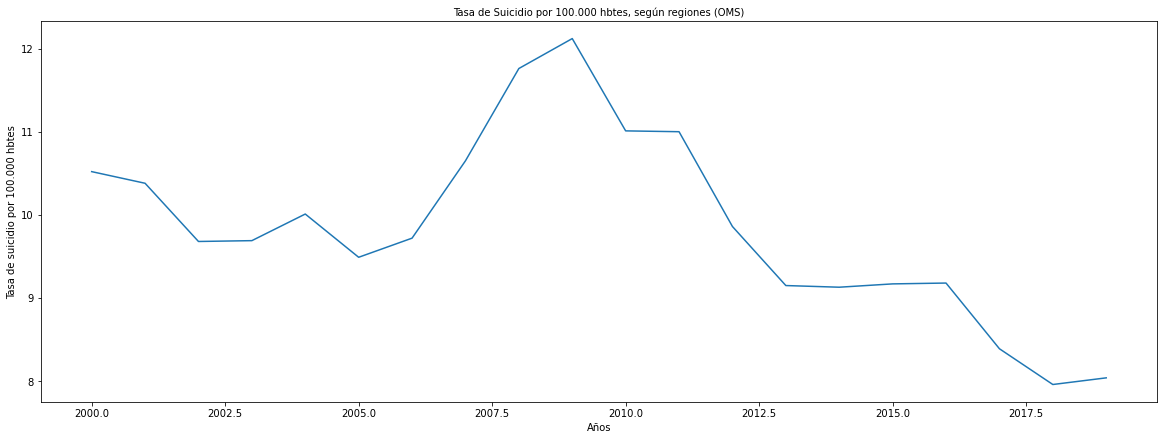

In [54]:
plt.figure(figsize=(20,7))
plt.plot(chile["Period"], chile["FactValueNumeric"]),
plt.title("Tasa de Suicidio por 100.000 hbtes, según regiones (OMS)",
         loc="center",
         size=10)
plt.xlabel("Años"),
plt.ylabel("Tasa de suicidio por 100.000 hbtes"),
plt.show()